In [11]:
# 引包
from ResearchMain import *

## 基因丰度数据预处理

In [12]:
# 对基因丰度数据矩阵进行预处理
df = gene_abundance.copy()  # 拷贝数据（不在源数据上进行修改）
df.loc[:, ['Period', 'River']] = all_df.loc[:, ['Period', 'River']]
df = df.reset_index()
df = df.melt(id_vars=['ID', 'Period', 'River'])  # 宽数据转化为长数据
df.rename(columns={
    'variable': 'Gene',
    'value': 'Abundance'
}, inplace=True)
df['Abundance'] = np.log10(np.abs(df['Abundance']))
df.set_index('ID', inplace=True)
# df


## 单个时期功能基因丰度图

In [13]:
# 时期选择
dry_df = df.loc[[i for i in df.index if i.startswith('D')]]
level_df = df.loc[[i for i in df.index if i.startswith('L')]]
wet_df = df.loc[[i for i in df.index if i.startswith('W')]]

<Figure size 1800x1200 with 0 Axes>

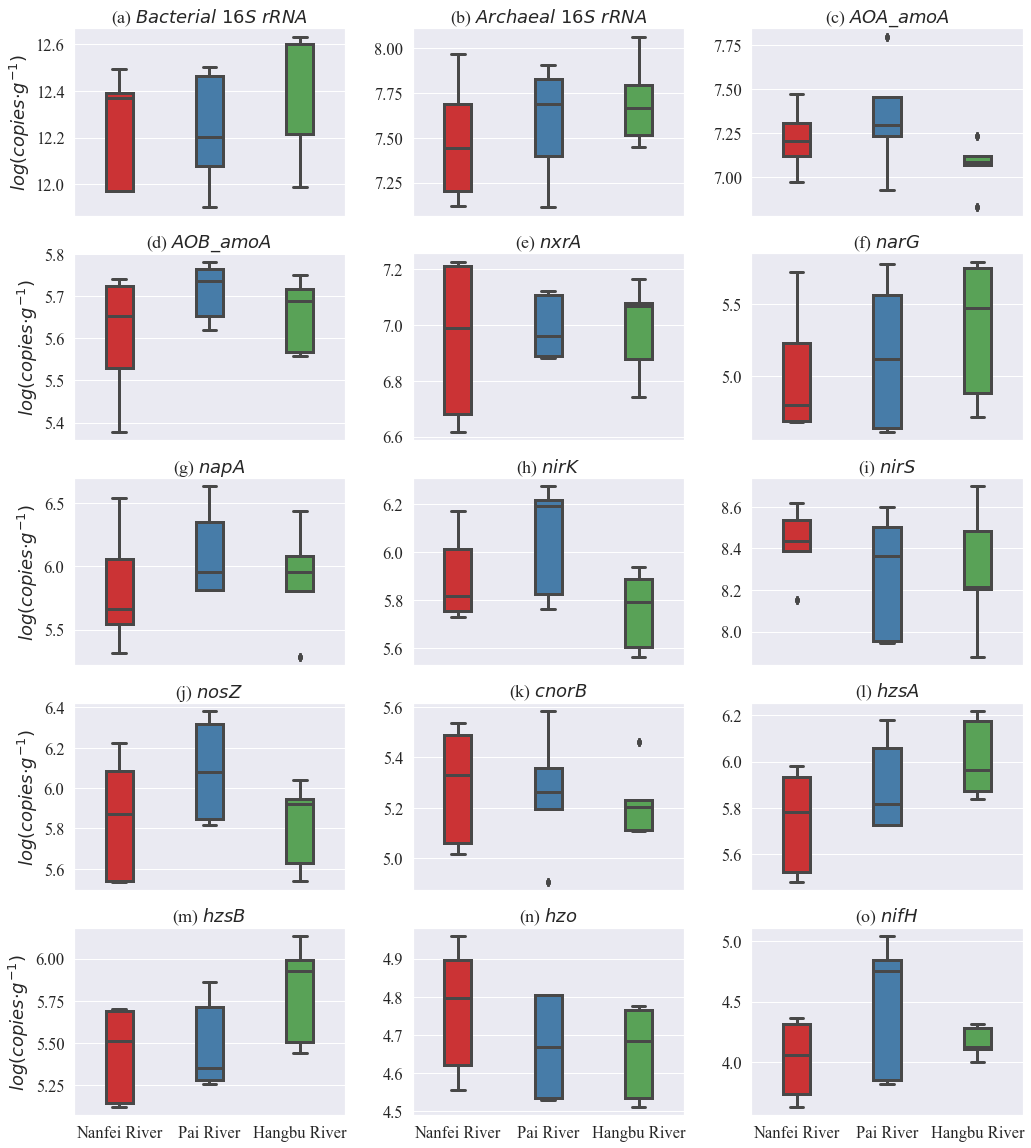

In [14]:
# 绘制单个时期功能基因丰度图
# seaborn绘图设置
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.5)
plt.figure(dpi=DPI)
fig, ax_arr = plt.subplots(
    ROW_NUM, COL_NUM, sharex='col', figsize=(17, 20))  # sharex、y设置子图共享x、y轴坐标
fig.subplots_adjust(hspace=0.2, wspace=0.25)  # 设置子图的横纵间距
for index, gene in enumerate(gene_list):
    row_num = index // 3
    col_num = index - row_num * 3
    cur_plot_item = sns.boxplot(
        x="River",
        y="Abundance",
        data=dry_df[dry_df['Gene'] == gene],
        palette="Set1",  # 颜色版
        # notch=True,  # 加入缺口
        width=0.3,
        linewidth=3,
        ax=ax_arr[row_num][col_num]
    )

    # 子图名称
    gene = gene.replace(' ', '\\ ').replace('_', '\\_')  # 对基因名称中的空格和下划线进行转义处理
    cur_plot_item.set_title(f'({CHAR[index]}) ' + '$' + gene + '$')
    # 子图x轴名称(只保留最后一行)
    cur_plot_item.set_xlabel(None)
    # 子图x轴名称(除去每行第2~最后的子图的y轴名称)
    if (index + 1) % COL_NUM != 1:
        cur_plot_item.set_ylabel(None)
    else:
        cur_plot_item.set_ylabel('$log(copies·g^{-1})$')

# 保存图片
fig.savefig(EXPORT_PATH + '功能基因丰度图-枯水期' +
            IMG_TYPE, dpi=DPI, bbox_inches='tight')

## 三个时期功能基因丰度图

<Figure size 1800x1200 with 0 Axes>

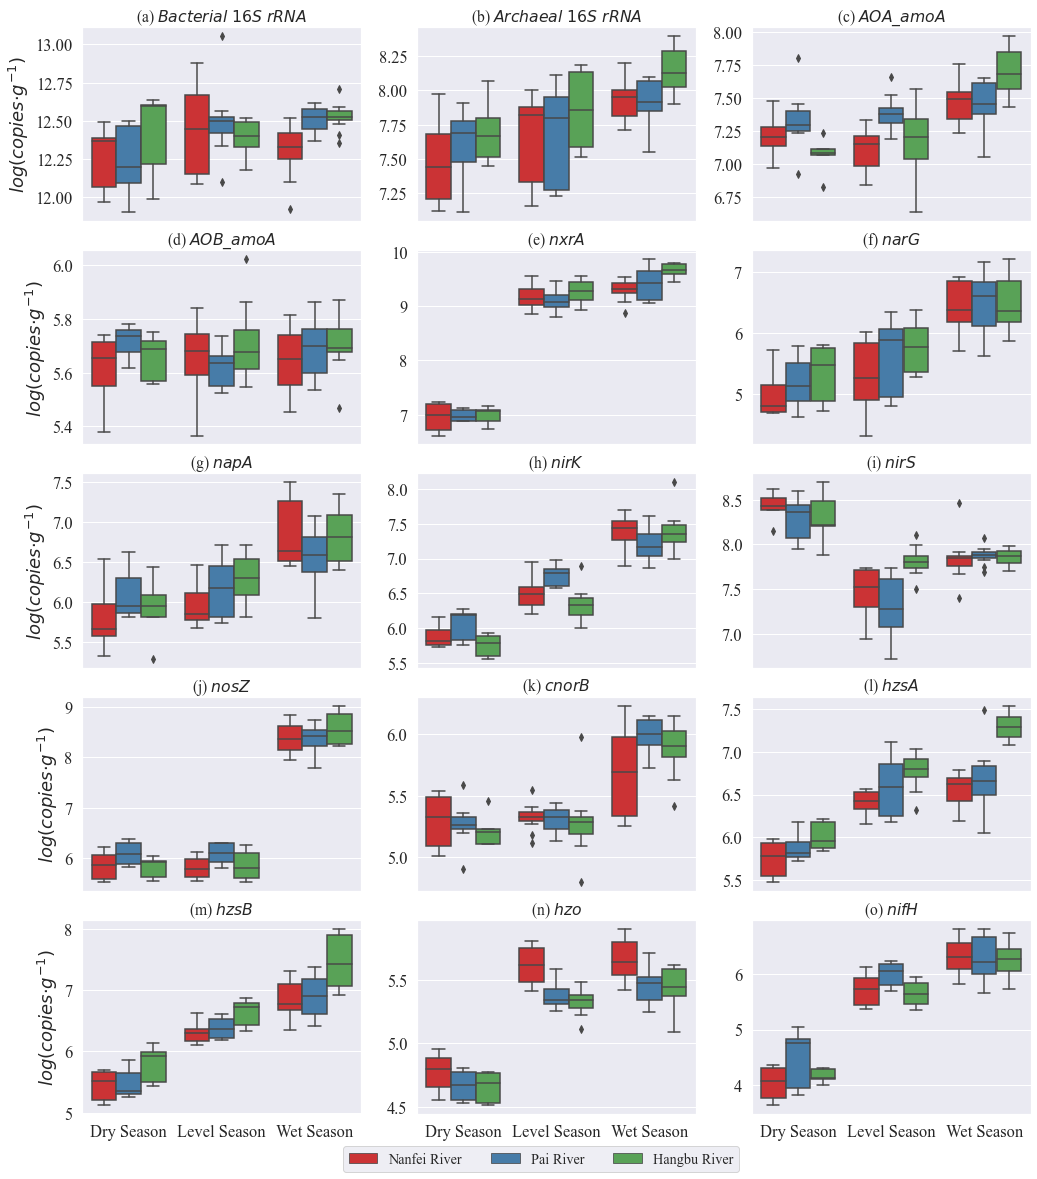

In [15]:
plt.figure(dpi=DPI)
fig, ax_arr = plt.subplots(
    ROW_NUM, COL_NUM, sharex='col', figsize=(17, 20))  # sharex、y设置子图共享x、y轴坐标
fig.subplots_adjust(hspace=0.15, wspace=0.2)  # 设置子图的横纵间距
sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.3)
for index, gene in enumerate(gene_list):
    row_num = index // 3
    col_num = index - row_num * 3
    cur_plot_item = sns.boxplot(
        x="Period",
        y="Abundance",
        hue="River",
        data=df[df['Gene'] == gene],
        palette="Set1",  # 颜色版
        # notch=True,  # 加入缺口
        ax=ax_arr[row_num][col_num]
    )
    # plt.yscale('log')
    # 删除子图的图例
    cur_plot_item.get_legend().remove()
    # 子图名称
    gene = gene.replace(' ', '\\ ').replace('_', '\\_')  # 对基因名称中的空格和下划线进行转义处理
    cur_plot_item.set_title(f'({CHAR[index]}) ' + '$' + gene + '$')
    # 子图x轴名称(只保留最后一行)
    cur_plot_item.set_xlabel(None)
    # 子图x轴名称(除去每行第2~最后的子图的y轴名称)
    if (index + 1) % COL_NUM != 1:
        cur_plot_item.set_ylabel(None)
    else:
        cur_plot_item.set_ylabel('$log(copies·g^{-1})$')

# plt.xticks(rotation=45)
# 主图图例
# 三个子图的图例相同，获取最后一个子图的图例
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=3, loc='lower center',
           bbox_to_anchor=(0.5, 0.08))
# 保存图片
fig.savefig(EXPORT_PATH + '功能基因丰度图' +
            IMG_TYPE, dpi=DPI, bbox_inches='tight')